# Data Scientist Associate Practical Exam Submission

In [1]:
# Initial imports
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Task 1 
The 8 columns were validated as described below:
- owned: same as the description, no missing values;
- make_model: same as the description, no missing values;
- review_month: some rows had incorrect formatting, including the day as part of the value (23-Oct, for example). This was fixed by removing all but the last three characters of each value;
- web_browser: 150 missing values, replaced with "unknown";
- reviewer_age: this column was stored as a string and had 105 invalid values, represented as '-'. The column was converted to the int type and the invalid values were replaced with the average age;
- primary_use: same as the description, no missing values;
- value_for_money: this column was stored as a string and every value had an unnecessary "/10" at the end of every rating. The last three characters of every value were removed and the column was converted to the int type.
- overall_rating: same as the description, no missing values;

After the validation, no rows were deleted and the dataset still has 8 columns and 1500 rows.

In [68]:
# Load the data and print the first rows
bike_ratings = pd.read_csv('electric_bike_ratings_2212.csv')
bike_ratings.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


with bike_ratings.info() we see that there are two columns with wrong types: "reviewer_age" and "value_for_money". This will be fixed later. Also, the only column with NaN values is "web_browser" (for now. After this, we will see that "reviewer_age" also has invalid values).

In [69]:
bike_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


On the cell below, we validate the Categorical columns:

Problems found:
- review_month: Some rows have the day before the month, instead of only the month (ex: 10-Jul);
- web_browser: 150 missing values;

In [70]:
cat_cols = ['owned', 'make_model', 'review_month', 'web_browser', 'primary_use']
for cat in cat_cols:
    print(f"Column {cat}:")
    print(bike_ratings[cat].value_counts(dropna=False))
    print(f"Column Type: {bike_ratings[cat].dtype}")
    print("----------------------")

Column owned:
1    890
0    610
Name: owned, dtype: int64
Column Type: int64
----------------------
Column make_model:
Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Column Type: object
----------------------
Column review_month:
Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64
Column Type: object
----------------------
Column web_browser:
Chrome     698
IE         239
Firefox    233
NaN        150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64
Column Type: object
----------------------
Column primary_use:
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64
Column Type: object
----------------------


Fixing the categorical columns problems:

In [71]:
bike_ratings["review_month"] = bike_ratings["review_month"].str[-3:]
bike_ratings.fillna({"web_browser":"unknown"},inplace=True)

On the cell below, we validate the Numerical columns, but first we need to remove the last three characters from each row of the "value_for_money" column and convert it to the 'int' dtype.

Also, we need to replace the '-' values of the "reviewer_age" column with NaN, convert the column to the 'Int64' dtype (the usual 'int' cannot store NaN values), and finally replace the NaN values with the average age. For type consistency with the rest of the dataset, we convert the column to 'int'.

After that, bike_ratings.describe() shows that the values are what we expected from the dataset description.

In [72]:
bike_ratings["value_for_money"] = bike_ratings["value_for_money"].str[:-3].astype('int')
bike_ratings["reviewer_age"].replace('-', np.nan, inplace=True)
bike_ratings["reviewer_age"] = bike_ratings["reviewer_age"].astype('Int64')
avg_reviewer_age = bike_ratings["reviewer_age"].mean().round()
bike_ratings["reviewer_age"].fillna(avg_reviewer_age, inplace=True)
bike_ratings["reviewer_age"] = bike_ratings["reviewer_age"].astype('int')

In [73]:
bike_ratings.describe()

,owned,reviewer_age,value_for_money,overall_rating
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.593333,32.626000,4.977333,17.138907
std,0.491375,9.876124,1.486257,2.445566
min,0.000000,16.000000,1.000000,11.690000
25%,0.000000,24.000000,4.000000,15.320000
50%,1.000000,33.000000,5.000000,18.240000
75%,1.000000,41.000000,6.000000,18.840000
max,1.000000,50.000000,10.000000,22.760000


## Task 2
**Graph 1 - Reviews by Ownership** shows that there are more reviews made by moped owners than by people that do not own a moped.  Owners make up almost 60% of the reviews, which means that our dataset is slightly unbalanced.

1    0.593333
0    0.406667
Name: owned, dtype: float64

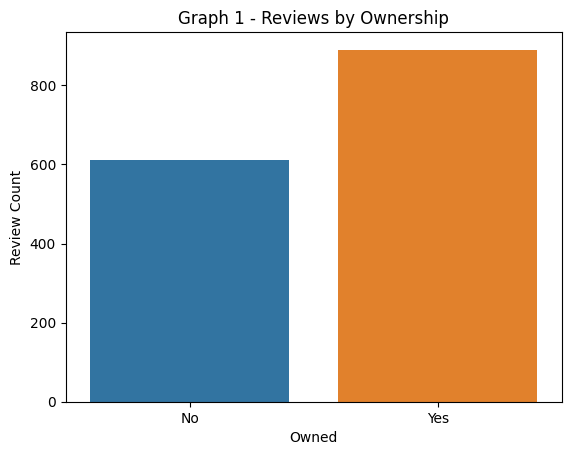

In [74]:
ax = sns.countplot(data=bike_ratings,x="owned")
ax.set_xticklabels(["No", "Yes"])
plt.title("Graph 1 - Reviews by Ownership")
plt.xlabel('Owned')
plt.ylabel('Review Count')

bike_ratings["owned"].value_counts(normalize=True)

## Task 3
**Graph 2 - Histogram of the Overall Rating** shows that there are no outliers and that the distribution loosely resembles a normal distribution, with a peak on the 18 to 19 range.

Text(0.5, 0, 'Overall Rating')

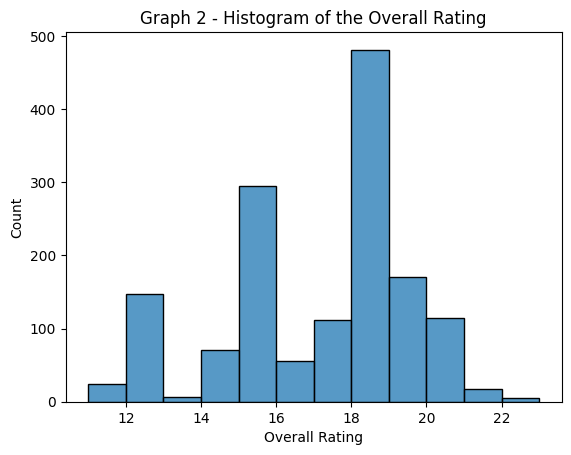

In [75]:
ax = sns.histplot(data=bike_ratings,x="overall_rating",binwidth=1, binrange=(11,23))

plt.title("Graph 2 - Histogram of the Overall Rating")
plt.xlabel('Overall Rating')


## Task 4
**Graph 3 - Boxplot between Overall Rating and Ownership** shows that the average overall rating of users that own a moped is higher than the rating of users that do not own a moped. We don't see outliers on the "No" category, but there are both high and low value outliers for the "Yes" category.

Text(0, 0.5, 'Overall Rating')

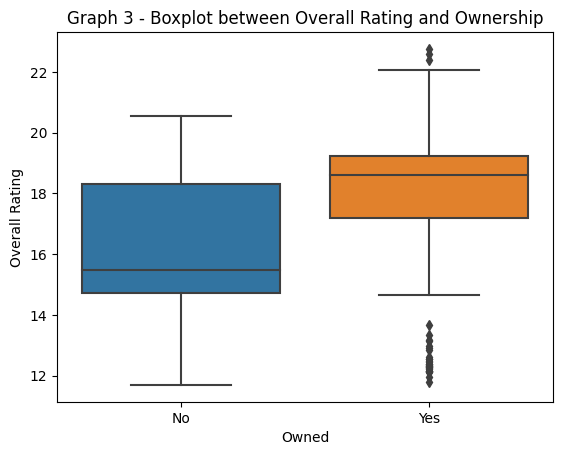

In [76]:
ax = sns.boxplot(data=bike_ratings,x='owned', y="overall_rating")

ax.set_xticklabels(["No", "Yes"])
plt.title("Graph 3 - Boxplot between Overall Rating and Ownership")
plt.xlabel('Owned')
plt.ylabel('Overall Rating')


## Task 5
We need to predict if the "owned" column of an unseen sample is 0 (not owned) or 1 (owned). We have two possible discrete categories, so we have a **classification** problem.

To be able to train classification models, we need to encode the 4 categorical variables of the dataset, so that the X and y variables only have numerical data.

In [77]:
features = bike_ratings.drop(columns='owned')
X = pd.get_dummies(features, columns=['make_model','review_month','web_browser', 'primary_use'])
y = bike_ratings['owned']

In [78]:
# Split dataset into 70% training set and 30% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40,stratify=y)

## Task 6
For the baseline model, we choose a K Neighbors Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

## Task 7
For the comparison model, we choose a Gradient Boosting Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150,random_state=40)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=150, random_state=40)

## Task 8
For the baseline model, I chose a KNeighbors Classifier because it simple to train and doesn't have many hyperparameters to tune. For the comparison model, I chose a Gradient Boosting Classifier because it is a more complex model that trains several diverse trees that can create a better model.

## Task 9
For the performance comparison, I will use the accuracy metric. The accuracy is a simple and adequate metric for our dataset, given that the dataset is mostly balanced.

In [81]:
# Start coding here... 
acc_knn =knn.score(X_test, y_test)
acc_gbc =gbc.score(X_test, y_test)

print(f"k-nearest neighbors classifier accuracy: {acc_knn}")
print(f"gradient boosting classifier accuracy: {acc_gbc}")


k-nearest neighbors classifier accuracy: 0.68
gradient boosting classifier accuracy: 0.7488888888888889


## Task 10
The Gradient Boosting Classifier has a higher accuracy value for the test set, which means that it performs better for the classification problem that we worked on.